# Binary Classification - Home Team Win-Loss Modeling
This short script imports logistic regression model class from sklearn and splits the data into test and validation sets to evaluate the performance on out of sample games.

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv('nbaHomeWinLossModelDataset.csv').drop(['Unnamed: 0'],axis=1)
data = data.dropna()
data.head(10)

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
5,0.622951,0.645161,2.0,0.457143,0.545455,-0.666667,0.561996,1,2020-21,0.666667,0.735294,1.0,0.709677,0.723077,13.333333,0.644613
6,0.549020,0.633333,2.0,0.457143,0.538462,-18.333333,0.507124,1,2020-21,0.596639,0.500000,1.0,0.625000,0.562500,16.666667,0.599989
7,0.514019,0.620690,1.0,0.457143,0.531250,-26.666667,0.480273,1,2020-21,0.521739,0.387097,1.0,0.437500,0.412698,-7.000000,0.568524
8,0.669565,0.774194,2.0,0.548387,0.661290,12.333333,0.569549,1,2020-21,0.458333,0.620690,2.0,0.470588,0.539683,-17.000000,0.489968
9,0.596774,0.766667,2.0,0.548387,0.655738,-4.666667,0.549138,1,2020-21,0.468468,0.620690,2.0,0.484848,0.548387,2.666667,0.540221


In [7]:
validation = data[data['SEASON'] == '2022-23']
modelData = data[data['SEASON'] != '2022-23'].sample(frac=1)

In [8]:
X = modelData.drop(['HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)

scaler.fit(X_test)
scaled_data_test = scaler.transform(X_test)

In [9]:
#Logistic Regression

model = LogisticRegression()
model.fit(scaled_data_train,y_train)
model.score(scaled_data_test,y_test)

0.6130790190735694

In [10]:
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro');
print("Logistic Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

Logistic Model F1 Accuracy: 0.58 (+/- 0.13)


In [11]:
# Test Set Review

y_pred = model.predict(scaled_data_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       334
           1       0.63      0.71      0.67       400

    accuracy                           0.61       734
   macro avg       0.61      0.60      0.60       734
weighted avg       0.61      0.61      0.61       734



In [12]:
#Validation Set review

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(validation.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data = scaler.transform(validation.drop(['HOME_W','SEASON'],axis=1))

In [13]:
# How the model performs on unseen data
y_pred = model.predict(scaled_val_data)
print(classification_report(validation['HOME_W'],y_pred))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       493
           1       0.65      0.71      0.68       690

    accuracy                           0.61      1183
   macro avg       0.60      0.59      0.59      1183
weighted avg       0.60      0.61      0.61      1183



/Users/apple/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


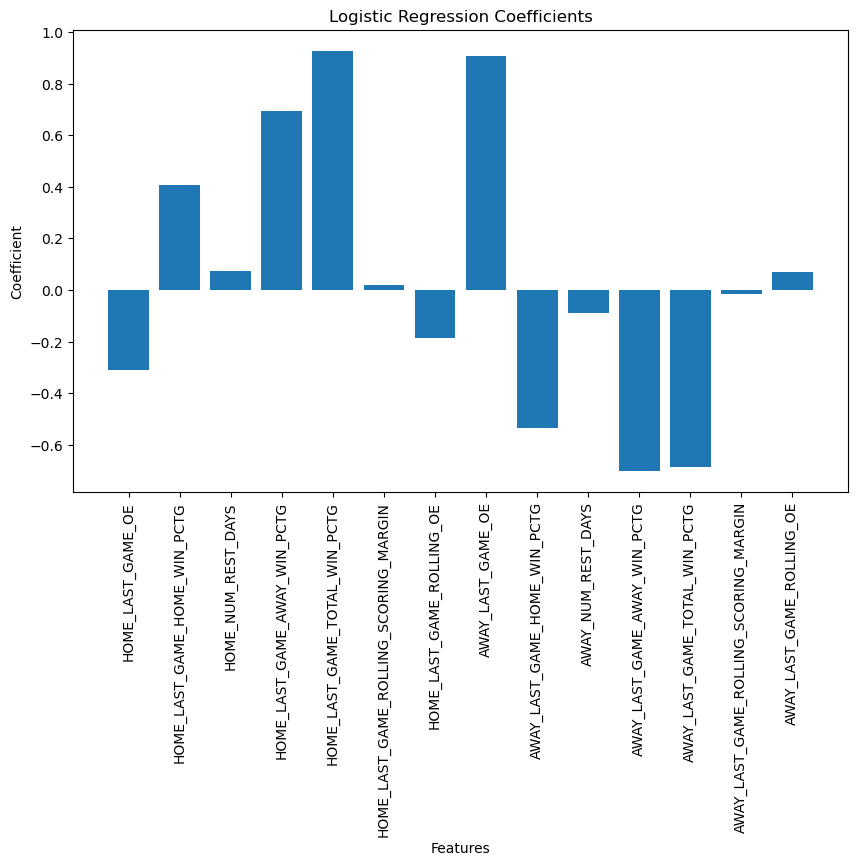

In [14]:
import matplotlib.pyplot as plt

# Fit the logistic regression model
model.fit(X_train, y_train)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture, loss function, and optimizer. Uses binary crossentropy as the loss function and the Adam optimizer.
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

# Compile the model, specifying the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric.
# The Adam optimizer is a variant of gradient descent that is widely used in machine learning because it automatically adapts the learning rate during training.
# Binary crossentropy is a loss function used for binary classification problems, and accuracy is a common evaluation metric for classification models.
# The compile method configures the model for training by specifying the optimizer, loss function, and evaluation metric.
# The optimizer is responsible for updating the model's weights during training, the loss function is used to measure the model's performance, and the evaluation metric is used to monitor the model's performance during training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, specifying the training data, number of epochs, and batch size.
# The fit method trains the model on the training data for a fixed number of epochs (iterations over the entire dataset).
# The batch size specifies the number of samples that are used to compute the gradient update during training.
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model, calculating the loss and accuracy on the test set.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/10
 1/47 [..............................] - ETA: 7s - loss: 2.9137 - accuracy: 0.4688

2024-03-23 17:18:44.208790: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 0s 3ms/step - loss: 2.8237 - accuracy: 0.4372 - val_loss: 2.7290 - val_accuracy: 0.4619
Epoch 2/10
47/47 [==============================] - 0s 961us/step - loss: 2.5455 - accuracy: 0.4399 - val_loss: 2.4402 - val_accuracy: 0.4646
Epoch 3/10
47/47 [==============================] - 0s 904us/step - loss: 2.2732 - accuracy: 0.4392 - val_loss: 2.1650 - val_accuracy: 0.4646
Epoch 4/10
47/47 [==============================] - 0s 904us/step - loss: 2.0106 - accuracy: 0.4426 - val_loss: 1.8923 - val_accuracy: 0.4619
Epoch 5/10
47/47 [==============================] - 0s 916us/step - loss: 1.7570 - accuracy: 0.4446 - val_loss: 1.6346 - val_accuracy: 0.4605
Epoch 6/10
47/47 [==============================] - 0s 944us/step - loss: 1.5183 - accuracy: 0.4493 - val_loss: 1.4020 - val_accuracy: 0.4619
Epoch 7/10
47/47 [==============================] - 0s 875us/step - loss: 1.3025 - accuracy: 0.4506 - val_loss: 1.1853 - val_accuracy: 0.4646
Epoch 8/10
47/47 [=

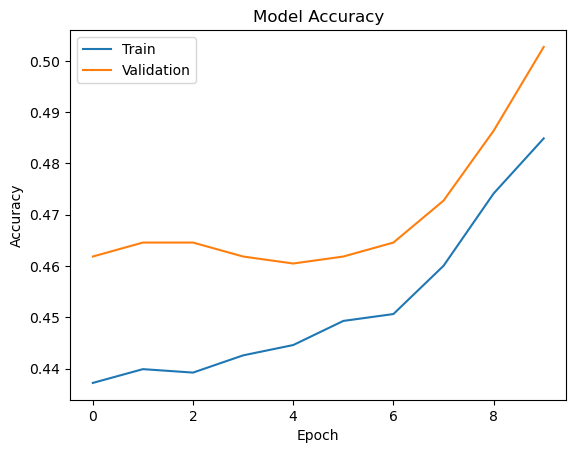

In [18]:
# Plot training and validation accuracy, loss over epochs, to visualize the model's performance during training.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
